# Workshop 1 - Implementation
    
In this notebook you will implement the matrix method and check it with some sanity checks.

Our matrix method implementation is now completely stored in a local package, consisting of three classes. If you need a refresher on how to code with Classes and Objects, refer to the [section on Object Oriented Programming in the MUDE-book](https://mude.citg.tudelft.nl/2024/book/external/learn-programming/book/python/oop/classes.html), with additionally [programming assignment 1.7](https://mude.citg.tudelft.nl/2024/files/Week_1_7/PA_1_7_classy_distributions.html).

In [1]:
import numpy as np
import matrixmethod as mm
%config InlineBackend.figure_formats = ['svg']

## 1. The Node class
This class is stored in `./matrixmethod/node.py`

The purpose of this class is to store node information and keep track of the total number of DOFs of the problem. Note the automatic bookkeeping we introduce in `__init__`. This simple but efficient way of keeping track of which DOFs belong to which nodes will make life much easier when we need to assemble matrices from multiple elements. The Node class doesn't need any modification.

> ### Task 1.1
> 
> To test whether you understand how the class works, create two nodes on coordinates ($0$,$0$) and ($3$,$4$) and print the string representation of both nodes. The `clear` function is called to restart the node and DOF counters. Make sure this is done whenever you start solving a new problem.


In [2]:
mm.Node.clear()  # ALWAYS DO THIS

node1 = mm.Node(0,0)
node2 = mm.Node(3,4)

print(node1)
print(node2)

This node has:
 - x coordinate=0,
 - z coordinate=0,
 - degrees of freedom=[0, 1, 2],
 - load vector=[0. 0. 0.]
This node has:
 - x coordinate=3,
 - z coordinate=4,
 - degrees of freedom=[3, 4, 5],
 - load vector=[0. 0. 0.]


> Your output should look like this:
> 
> ```
> This node has:
>  - x coordinate=0,
>  - z coordinate=0,
>  - degrees of freedom=[0, 1, 2],
>  - load vector=[0. 0. 0.])
> This node has:
>  - x coordinate=3,
>  - z coordinate=4,
>  - degrees of freedom=[3, 4, 5],
>  - load vector=[0. 0. 0.])
> ```

## 2. The Element class
This class is stored in `./matrixmethod/elements.py`

This class keeps track of each element in the model, including:
- Cross-section properties
- Element orientation (for coordinate system transformations)
- Which Nodes make up each element, and in turn (with help of the Node class) which DOFs belong to each element

Apart from bookkeeping element data, the other main task of this class is to provide the element stiffness matrix in the global coordinate system (for subsequent assembly) and postprocess element-level fields. For now we keep postprocessing for next week and focus only on getting the correct stiffness matrix.

Here the class describes an element combining extension and Euler-Bernoulli bending. A similar (or inherited) class could also be implemented for different element types (*e.g.* shear beam, Timoshenko beam, cable elements, etc). Here we also keep it simple by assuming elements are all arranged in a 2D plane.

However, the implementation is incomplete:
- The transformation matrix is missing in `__init__`, which is given in the [online book](https://ciem5000-2025.github.io/book/lecture1/transformations.html). Make sure you take into account that a positive $\Delta z$ with a positive $\Delta x$ gives a negative angle $\alpha$. Make use of `numpy.arctan2` to return the angle between $-\pi$ and $\pi$, `numpy.arctan` returns an angle between $-\cfrac{\pi}{2}$ and $-\cfrac{\pi}{2}$, and therefore cannot distinguish between all four quadrants.
- The correct stiffness matrix for this extension-bending element coordinate system is missing in `stiffness`. You can derive the stiffness matrix yourself using pen and paper, SymPy or Maple, or copy the given stiffness matrix from the [online book](https://ciem5000-2025.github.io/book/lecture1/other_elements.html).
- We keep the functions which add a distributed load and compute the moments / displacements untouched for this week. Next week we'll implement those as well.


> ### Task 2.1
>
> Add the missing pieces to the code in `./matrixmethod/elements.py`, before you perform the checks below. Do you specify your stiffness matrix in the global or local coordinate system?

Whenever you make changes to your code in the `./matrixmethod/` folder, you need to reimport those. Instead of restarting the kernel, we use some magic ipython commands. Run the cell below once. Consequently, whenever you save your changes in one of the `.py`-files, it's automatically reloaded.

In [3]:
%load_ext autoreload
%autoreload 2

> ### Task 2.2
> 
>First, let's check the stiffness matrix for a beam which doesn't require rotation. Create a horizontal element with length $2$ and $EI=4$ and print both the transformation matrix and the stiffness matrix.
>
> Do the matrices match with what you'd expect?

In [4]:
mm.Node.clear()
mm.Element.clear()

node1 = mm.Node(0,0)
node2 = mm.Node(2,0)

elem = mm.Element(node1, node2)

section = {}
section['EI'] = 4 # i inputted it

elem.set_section(section)

print(elem)  # details about element

print(elem.T)  # details about transformation matrix which is equal 
#to Identity since local coord system aligns with the global coord system
print(elem.stiffness())

Element connecting:
node #1:
 This node has:
 - x coordinate=0,
 - z coordinate=0,
 - degrees of freedom=[0, 1, 2],
 - load vector=[0. 0. 0.]
with node #2:
 This node has:
 - x coordinate=2,
 - z coordinate=0,
 - degrees of freedom=[3, 4, 5],
 - load vector=[0. 0. 0.]
[[ 1. -0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1. -0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]]
[[ 5.e+19  0.e+00  0.e+00 -5.e+19  0.e+00  0.e+00]
 [ 0.e+00  6.e+00 -6.e+00  0.e+00 -6.e+00 -6.e+00]
 [ 0.e+00 -6.e+00  8.e+00  0.e+00  6.e+00  4.e+00]
 [-5.e+19  0.e+00  0.e+00  5.e+19  0.e+00  0.e+00]
 [ 0.e+00 -6.e+00  6.e+00  0.e+00  6.e+00  6.e+00]
 [ 0.e+00 -6.e+00  4.e+00  0.e+00  6.e+00  8.e+00]]


The transformation matrix is identity which should be because the local coordinate system is aligned with the global coordinate system

The values of the stiffness matrix are manually checked with the stiffness matrix from the slides and are correct.

> ### Task 2.3
> Now, create a vertical element with length $2$ and $EI=4$ and print the transformation and stiffness matrix.
> 
> Do the matrices match with what you'd expect?

In [5]:
mm.Node.clear()
mm.Element.clear()

node1 = mm.Node(0,0)
node2 = mm.Node(0,2)

elem = mm.Element(node1, node2)

section = {}
section['EI'] = 4 # i inputted it

elem.set_section(section)

#print(elem)
print(elem.T)  # transformation matrix
print(elem.stiffness())  # stiffness matrix

[[ 6.123234e-17  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00]
 [-1.000000e+00  6.123234e-17  0.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
   0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  6.123234e-17  1.000000e+00
   0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00  6.123234e-17
   0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   1.000000e+00]]
[[ 6.0000000e+00  3.0616170e+03  6.0000000e+00 -6.0000000e+00
  -3.0616170e+03  6.0000000e+00]
 [ 3.0616170e+03  5.0000000e+19 -3.6739404e-16 -3.0616170e+03
  -5.0000000e+19 -3.6739404e-16]
 [ 6.0000000e+00 -3.6739404e-16  8.0000000e+00 -6.0000000e+00
   3.6739404e-16  4.0000000e+00]
 [-6.0000000e+00 -3.0616170e+03 -6.0000000e+00  6.0000000e+00
   3.0616170e+03 -6.0000000e+00]
 [-3.0616170e+03 -5.0000000e+19  3.6739404e-16  3.0616170e+03
   5.0000000e+19  3.673

Substitute $\alpha = -\pi/2$ into transformation matrix. The values of $6.123234e-17$ are equal to $0$, since $\cos(-\pi/2)=0$

The transformation matrix moves the extension terms to the column corresponding to the vertical displacements, which is correct. 

The transformation matrix moves the deflection terms to the column corresponding to the horizontal displacements, which is correct.

The rotation terms are untouched, which is correct

> ### Task 2.4
>
>Now, create an element rotated $120 \degree$ with length $2$ and print the transformation matrix.
>
>Does it match with what you'd expect?

In [6]:
mm.Node.clear()
mm.Element.clear()

node1 = mm.Node(0,0)
node2 = mm.Node(-1,-np.sqrt(3))
elem = mm.Element ( node1, node2 )

print(elem)
print(elem.T)

Element connecting:
node #1:
 This node has:
 - x coordinate=0,
 - z coordinate=0,
 - degrees of freedom=[0, 1, 2],
 - load vector=[0. 0. 0.]
with node #2:
 This node has:
 - x coordinate=-1,
 - z coordinate=-1.7320508075688772,
 - degrees of freedom=[3, 4, 5],
 - load vector=[0. 0. 0.]
[[-0.5       -0.8660254  0.         0.         0.         0.       ]
 [ 0.8660254 -0.5        0.         0.         0.         0.       ]
 [ 0.         0.         1.         0.         0.         0.       ]
 [ 0.         0.         0.        -0.5       -0.8660254  0.       ]
 [ 0.         0.         0.         0.8660254 -0.5        0.       ]
 [ 0.         0.         0.         0.         0.         1.       ]]


- Again, the rotation term is not trasnformed, which is expected.
- A rotation of 120 degrees corresponds with $\cos(120)=-0.5$, which is correctly calculated.
- A rotation of 120 degrees corresponds with $\sin(120)=0.866$ which is correctly calculated

> ### Task 2.5
>
>Now, create an element rotated $60 \degree$ with length $2$ and print the transformation matrix.
>
>Does it match with what you'd expect?

In [7]:
mm.Node.clear()
mm.Element.clear()

node1 = mm.Node(0,0)
node2 = mm.Node(1,-np.sqrt(3))
elem = mm.Element ( node1, node2 )

print(elem)
print(elem.T)

Element connecting:
node #1:
 This node has:
 - x coordinate=0,
 - z coordinate=0,
 - degrees of freedom=[0, 1, 2],
 - load vector=[0. 0. 0.]
with node #2:
 This node has:
 - x coordinate=1,
 - z coordinate=-1.7320508075688772,
 - degrees of freedom=[3, 4, 5],
 - load vector=[0. 0. 0.]
[[ 0.5       -0.8660254  0.         0.         0.         0.       ]
 [ 0.8660254  0.5        0.         0.         0.         0.       ]
 [ 0.         0.         1.         0.         0.         0.       ]
 [ 0.         0.         0.         0.5       -0.8660254  0.       ]
 [ 0.         0.         0.         0.8660254  0.5        0.       ]
 [ 0.         0.         0.         0.         0.         1.       ]]


> ### Task 2.6
> 
> For the previous element, a global displacement vector $\mathbf{u}^{(e)} = \begin{bmatrix} 0 \\0 \\ 0 \\ \sqrt{3} \\ 1 \\ 0 \end{bmatrix}$ is given. What would be the local displacement vector $\bar{\mathbf{u}}^{(e)}$?
>
> Check your answer using pen and paper. Tip: make a drawing instead of doing all the algebra.


In [8]:
print(np.matmul(elem.T,np.array([0,0,0,np.sqrt(3),1,0])))

print(elem.T)  # same as previous

[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.22044605e-16
 2.00000000e+00 0.00000000e+00]
[[ 0.5       -0.8660254  0.         0.         0.         0.       ]
 [ 0.8660254  0.5        0.         0.         0.         0.       ]
 [ 0.         0.         1.         0.         0.         0.       ]
 [ 0.         0.         0.         0.5       -0.8660254  0.       ]
 [ 0.         0.         0.         0.8660254  0.5        0.       ]
 [ 0.         0.         0.         0.         0.         1.       ]]


## 3. The Constrainer class
This class is stored in `./matrixmethod/constrainer.py`

This small class keeps track of which DOFs have prescribed displacements and takes care of applying these constraints to the global $\mathbf{K}$ and $\mathbf{f}$. For now we keep it simple and assume all constraints fix the DOF values to zero. Next week we will deal with non-zero prescribed values. 

However, the implementation is incomplete:
- The `constrain` function is incomplete, which should mimic the process of striking rows/columns of constrained DOFs and reduce the size of the system to be solved. Remember that `Constrainer` stores which DOFs are constrained in `self.dofs`, so **all the others** should be free. After gathering the free DOFs in an array, you will need to select the correct blocks of $\mathbf{K}$ and $\mathbf{f}$. For the stiffness matrix you will need the `np.ix_()` helper function (check its documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.ix_.html))
- We keep the function which calculates supports reaction untouched for this week. Next week we'll implement that one as well.

> ### Task 3.1
> Add the missing pieces to the code, before you perform the check below

> ### Task 3.2
> 
> Take the inclined element of task 2.5 and a bending stiffness of $1$. What happens if you invert $\mathbf{K}$? Now fix all degrees of freedom of the first node. What happens when you invert your 'constrained' $\mathbf{K}$? Are the dimensions of the 'constrained' $\mathbf{K}$ correct?

In [9]:
section = {}
section['EI'] = 1
elem.set_section (section)

k = elem.stiffness()
#print(np.linalg.inv(k))

con = mm.Constrainer()

con.fix_node (node1)

print(con)

f = np.zeros (6) #empty load vector
Kff, Fff = con.constrain( k, f )
print(np.shape(np.linalg.inv(Kff)))

This constrainer has constrained the degrees of freedom: [0, 1, 2] with corresponding constrained values: [0, 0, 0])
(3, 3)


- The inverted matrix of original **K** gives a singular matrix, which is expected as the structure can perform any rigid body translation / rotation. The matrix needs to be reduced by consideration of Dirichlet BCs.
- The cosntrained matrix reduces **K** to only the free terms, which is not singular any more.
- The dimensions should match the number of free dof, which is 3.

## 4. Full implementation extension bar

Having made our implementations, we now check them with two simple examples that serve as sanity checks. The first is a simple bar undergoing extension:

<center><figure>
  <IMG SRC="https://raw.githubusercontent.com/ibcmrocha/public/main/extpointload.png" WIDTH=200 ALIGN="center">
      </figure></center>

With $EA = 1000$, $F = 100$ and $L = 1$.

Use the code blocks below to set up and solve this problem using the classes above. The steps to follow are outlined below and short explanations/hints are given. Once you have a solution for the horizontal displacement of the node at the right end of the bar, compare it to the analytical solution you obtained in the first half of the course.

In [10]:
mm.Node.clear()
mm.Element.clear()

> ### Task 4.1: 
> 
> Create two nodes here. You can store them on a `list` or simply create them as two separate objects (*e.g.* `node1` and `node2`). 

In [12]:
L = 1

node1 = mm.Node(0,0)
node2 = mm.Node(L,0)

> ### Task 4.2
> 
> Here we only have a single element, so there is no need to store it in a `list` yet. You are also going to need a `dict` defining the cross-section of the element.

In [13]:
elem = mm.Element ( node1, node2 )

EA = 1000
section = {}
section['EA'] = EA

elem.set_section (section)
print(elem)

Element connecting:
node #1:
 This node has:
 - x coordinate=0,
 - z coordinate=0,
 - degrees of freedom=[0, 1, 2],
 - load vector=[0. 0. 0.]
with node #2:
 This node has:
 - x coordinate=1,
 - z coordinate=0,
 - degrees of freedom=[3, 4, 5],
 - load vector=[0. 0. 0.]


> ### Task 4.3
> 
> Let's define the boundary conditions. We create an instance of the `Constrainer` class to deal with prescribed displacements. Take a look at its functions and inform if Node 1 is fully fixed.
> You also need to pass the load $F$ on to Node 2. Check the member functions of `Node` to infer how that should be done.

In [14]:
con = mm.Constrainer()

con.fix_node (node1)

F  = 100
node2.add_load ([F,0,0])

print(node2)
print(con)

This node has:
 - x coordinate=1,
 - z coordinate=0,
 - degrees of freedom=[3, 4, 5],
 - load vector=[100.   0.   0.]
This constrainer has constrained the degrees of freedom: [0, 1, 2] with corresponding constrained values: [0, 0, 0])


> ### Task 4.4
> 
> Now assemble the global stiffness matrix and force vector. Since we only have one element, there is no real assembly to be performed other than getting the stiffness matrix of the single element and storing the load at Node 2 in the correct positions of $\mathbf{f}$.

In [32]:
global_k = elem.stiffness()
global_f = np.zeros (6)

global_f[0:3] = node1.p
global_f[3:6] = node2.p

> ### Task 4.5
> 
> Constrain the problem and solve for nodal displacements

In [33]:
Kff, Ff = con.constrain ( global_k, global_f )
u = np.matmul ( np.linalg.inv(Kff), Ff )
print(u)

[ 0.          0.03333333 -0.05      ]


> ### Task 4.6
> 
> Finally, compare the displacement at the end of the bar with the one coming from the ODE solution. Note that since our element is already suitable for frames combining extension and bending, $\mathbf{u}$ has three entries. Which one is the entry that matters to us here? Did your solutions match? If so, that is a sign your implementation is correct. Can you use the function `full_disp` to obtain a vector of all displacements?

In [21]:
con.full_disp(u)

array([0. , 0. , 0. , 0.1, 0. , 0. ])

## Task 5: Full implementation bending beam

In the first example above we tested our model under extension. But that does not really guarantee it will behave correctly in bending. That is the goal of this second sanity check. Let's solve the following problem:

<center><figure>
  <IMG SRC="https://raw.githubusercontent.com/ibcmrocha/public/main/cantilever.png" WIDTH=200 ALIGN="center">
      </figure></center>

Choose appropriate values yourself

When setting up and solving your model, note that we are now interested in $w$ displacements, our load is now vertical and the cross-section property driving our deformation is now $EI$. Good luck!

In [22]:
mm.Node.clear()
mm.Element.clear()

> ### Task 5.1: Create nodes

In [23]:
L = 1

node1 = mm.Node(0,0)
node2 = mm.Node(L,0)

> ### Task 5.2: Create element

In [24]:
elem = mm.Element ( node1, node2 )

EI = 1000
section = {}
section['EI'] = EI

elem.set_section (section)
print(elem)

Element connecting:
node #1:
 This node has:
 - x coordinate=0,
 - z coordinate=0,
 - degrees of freedom=[0, 1, 2],
 - load vector=[0. 0. 0.]
with node #2:
 This node has:
 - x coordinate=1,
 - z coordinate=0,
 - degrees of freedom=[3, 4, 5],
 - load vector=[0. 0. 0.]


> ### Task 5.3: Set boundary conditions

In [25]:
con = mm.Constrainer()

con.fix_node (node1)

F  = 100
node2.add_load ([0,F,0])

print(node2)
print(con)

This node has:
 - x coordinate=1,
 - z coordinate=0,
 - degrees of freedom=[3, 4, 5],
 - load vector=[  0. 100.   0.]
This constrainer has constrained the degrees of freedom: [0, 1, 2] with corresponding constrained values: [0, 0, 0])


> ### Task 5.4: Assemble the system of equations

In [30]:
global_k = elem.stiffness()
global_f = np.zeros (6)

global_f[0:3] = node1.p
global_f[3:6] = node2.p

> ### Task 5.5: Constrain the problem and solve for nodal displacements

In [31]:
Kff, Ff = con.constrain ( global_k, global_f )
u = np.matmul ( np.linalg.inv(Kff), Ff )
print(u)

[ 0.          0.03333333 -0.05      ]


> ### Task 5.6: Check with the analytical solution
> 
> Did your solutions match? If so, your implementation is correct!

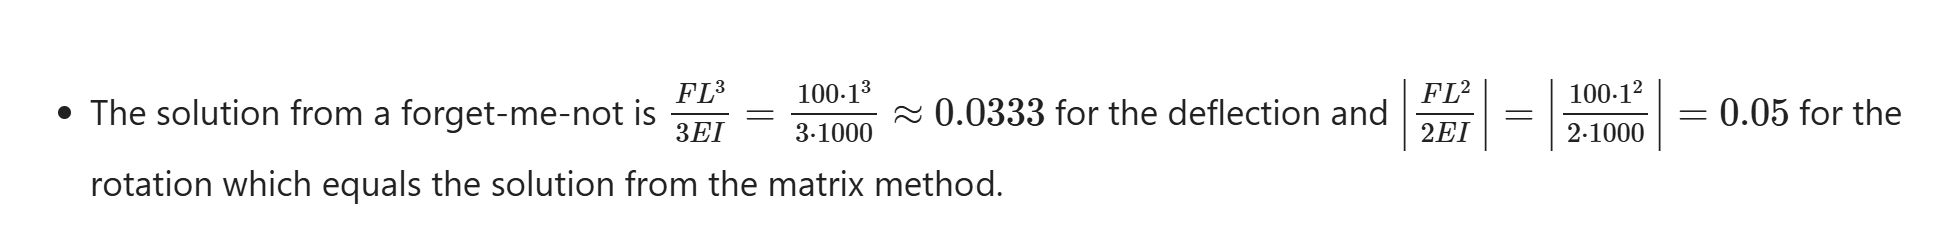